### Import Packages

In [11]:
import pandas                  as     pd
import numpy                   as     np
import seaborn                 as     sns
import os 
import matplotlib.pyplot       as     plt
from   utils_text_clf          import utils_text_clf as utils
from   sklearn.model_selection import StratifiedKFold, \
                                      cross_validate, \
                                      cross_val_predict, \
                                      GridSearchCV
from   sklearn.pipeline        import Pipeline                            
from   sklearn.preprocessing   import StandardScaler, \
                                      RobustScaler, \
                                      MinMaxScaler
from   sklearn.tree            import DecisionTreeClassifier
from   sklearn.linear_model    import LogisticRegression
from   sklearn.svm             import LinearSVC, SVC
from   sklearn.neighbors       import KNeighborsClassifier
from   sklearn.naive_bayes     import GaussianNB
from   sklearn.ensemble        import RandomForestClassifier, \
                                      AdaBoostClassifier, \
                                      GradientBoostingClassifier
from   sklearn.manifold        import TSNE
from   sklearn.decomposition   import PCA
import xgboost                 as     xgb
from   sklearn.metrics         import roc_curve
from   scipy                   import interp
from   pathlib                 import Path
from   pickle                  import dump
import joblib

# Turn interactive plotting off
plt.ion()  
import warnings
warnings.filterwarnings("ignore")

### Run feature engineering

In [ ]:
#%% run feature engineering code 
%run feature_engineering.py
print('done!')

### Enter mutable info

In [5]:
#%% Enter mutable info

data_dir    = os.path.join(os.getcwd(), 'data')
results_dir = os.path.join(os.getcwd(), 'results')

# training data 
#file_train = 'train.jsonl'

# training data
file_train  = 'train_feature_engineering.csv';
file_test   = 'test_feature_engineering.csv'

#file_train = os.path.join(data_dir, file_train) 
file_train  = os.path.join(data_dir, file_train) 
file_test   = os.path.join(data_dir, file_test)

### Load in data 

In [6]:
#%% load in data 

#df_train = utils.parse_json(file_train)
df_train  = pd.read_csv(file_train)

# feats
x_train  = df_train.iloc[:, 1:]

# labels 
y_train  = df_train.label

# convert labels to binary (1 - sarcasm)
y_train  = [1 if i == 'SARCASM' else 0 for i in y_train]

In [7]:
#%% check label proportions 

# print count
print('The count of sarcastic tweets is:', y_train.count(1))
print('The count of non-sarcastic tweets is:', y_train.count(0))

The count of sarcastic tweets is: 2500
The count of non-sarcastic tweets is: 2500


In [18]:
# check the size of the training data 
x_train.shape

(5000, 9967)

In [22]:
# compute PCAs
pca = PCA().fit(x_train)
print('pca done!')

pca done!


In [37]:
# variance explained 
var_exp = np.cumsum(pca.explained_variance_ratio_)

# num of components 
n_comp  = range(len(var_exp))

Text(0, 0.5, 'cumulative explained variance')

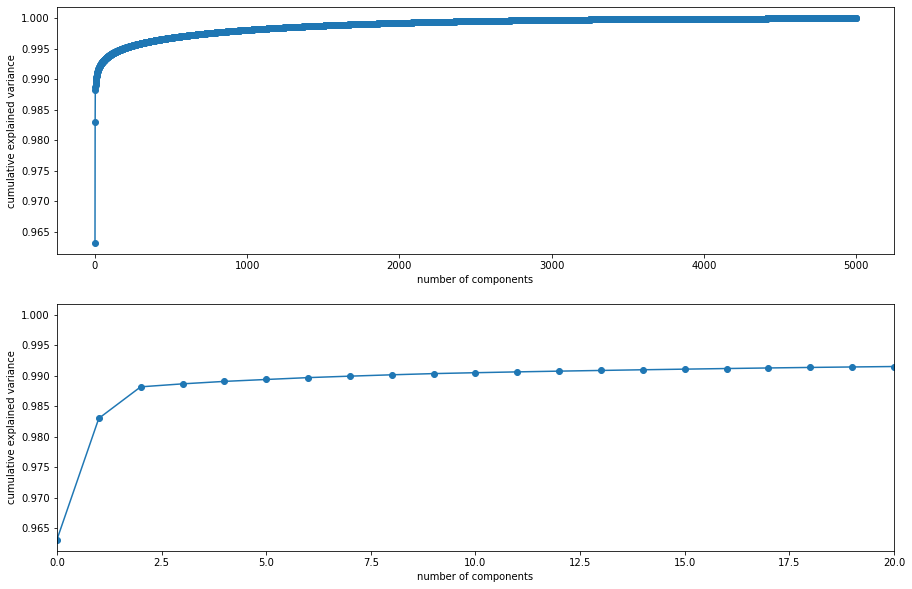

In [40]:
# plot explained variance vs. # of components 

f, (ax1, ax2) = plt.subplots(2, 1, sharey = True, figsize = (15, 10))
ax1.plot(n_comp, var_exp, '-o')
ax1.set_xlabel('number of components')
ax1.set_ylabel('cumulative explained variance') 

# zoom in 
xmax = 20
ax2.plot(n_comp, var_exp, '-o')
ax2.set_xlim([0, xmax])
ax2.set_xlabel('number of components')
ax2.set_ylabel('cumulative explained variance')

In [ ]:
# save session 
import dill 
dill.dump_session('nb_pca_complete.db')

In [ ]:
# visualize features in low-dimensional space

tsne     = TSNE(n_components = 3, learning_rate = 100, random_state = 42)

# transform on data 
tsne_obj = tsne.fit_transform(x_train)

# put results into a df
tsne_df  = pd.DataFrame({'x' : tsne_obj[:,0], 
                         'y' : tsne_obj[:,1], 
                         'z' : tsne_obj[:,2], 
                         'label': y_train})

In [ ]:
#%% 2D scattrplot 

sns.scatterplot(x = "x", y = "y", hue = "label", palette = ["blue", "red"], 
                legend = 'full', data = tsne_df);
plt.title('Feature tsne plot')
plt.gca().set_aspect('equal', adjustable = 'box')

fig_name  = 'feat_tsne_plot_2d.jpg'
fig_file  = os.path.join(results_dir, fig_name)

manager   = plt.get_current_fig_manager()
manager.window.showMaximized()
plt.show()
plt.pause(0.1) # needed for the image to be saved at full size
plt.savefig(fig_file)

In [ ]:
#%% 3D scatterplot 

ax = plt.figure(figsize=(16,10)).gca(projection = '3d')

ax.scatter(xs    = tsne_df.loc[tsne_df['label'] == 0]["x"],
           ys    = tsne_df.loc[tsne_df['label'] == 0]["y"],
           zs    = tsne_df.loc[tsne_df['label'] == 0]["z"],
           c     = 'blue', 
           label = '0') 

ax.scatter(xs    = tsne_df.loc[tsne_df['label'] == 1]["x"],
           ys    = tsne_df.loc[tsne_df['label'] == 1]["y"],
           zs    = tsne_df.loc[tsne_df['label'] == 1]["z"],
           c     = 'red',
           label = '1') 

ax.set_xlabel('tsne_1')
ax.set_ylabel('tsne_2')
ax.set_zlabel('tsne_3')

plt.title('feat tsne scatterplot')
plt.legend()
plt.show()

fig_name  = 'feat_tsne_plot_3d.pickle'
fig_file  = os.path.join(results_dir, fig_name)

# save figure 
output    = open(fig_file, 'wb')
dump(plt.gcf(), output)
output.close()